In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head(8)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# Dropping Unwanted columns
df.drop(['CustomerID'], axis=1,inplace=True)

In [ ]:
# Encoding the categorical data into numerical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


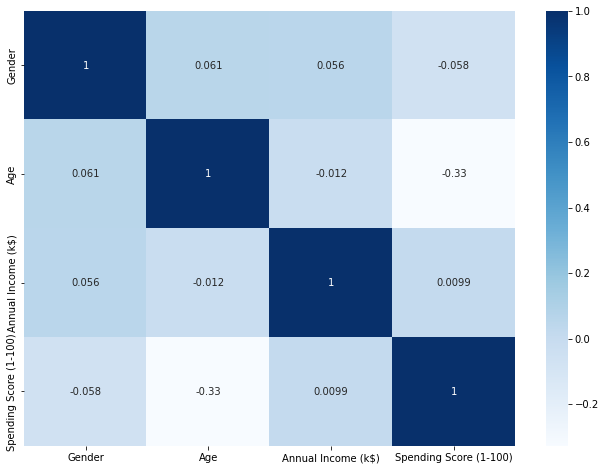

In [ ]:
fig,ax = plt.subplots(figsize=(11,8))
sns.heatmap(df.corr(),annot=True,cmap="Blues" ,ax=ax)
plt.show()

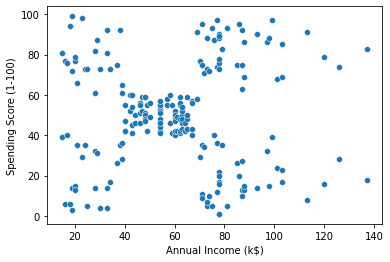

In [ ]:
sns.scatterplot(df['Annual Income (k$)'], df['Spending Score (1-100)'])

#**Clustering**

In [ ]:
X = df.iloc[:,-2:]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

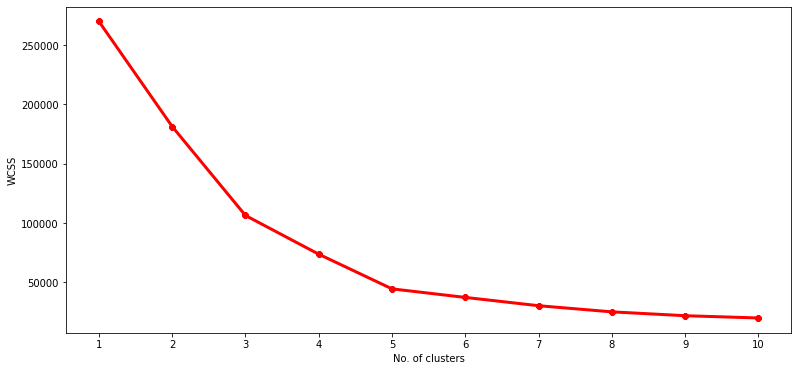

In [ ]:
# plot the results for elbow method
plt.figure(figsize=(13,6))
plt.plot(range(1,11), wcss)
plt.plot(range(1,11), wcss, linewidth=3, color='red', marker='8')
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1,11,1))
plt.show()

In [ ]:
km = KMeans(n_clusters=5)
km.fit(X)
y = km.predict(X)
X['Cluster'] = y
X.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4


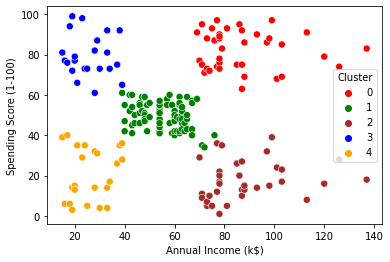

In [ ]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=X, hue='Cluster', s=50, palette=['red', 'green', 'brown', 'blue', 'orange'])

Cluster 1 contains customers with **high annual income** but low **spending score.**

Cluster 2 contains customers with **average annual income** and **average spending score**.

Cluster 3 contains customers with **high annual income** and **high spending score.**

Cluster 4 contains customers with **low annual income** but **high spending score**.

Cluster 5 contains customers with **low annual income** and low **spending score**.

#**Machine learning**

In [ ]:
X['cluster'] = y
df=X
df.to_csv('Processed data.csv',header=None)

In [ ]:
colnames=['Age', 'Annual income', 'Spending score', 'Cluster'] 
df1 = pd.read_csv('/content/Processed data.csv',names=colnames)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
df1

,Age,Annual income,Spending score,Cluster
0,15,39,4,4
1,15,81,3,3
2,16,6,4,4
3,16,77,3,3
4,17,40,4,4
...,...,...,...,...
195,120,79,0,0
196,126,28,2,2
197,126,74,0,0
198,137,18,2,2


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score,ConfusionMatrixDisplay

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.9666666666666667
